# Constant‑Weave Visual Suite (v10)
Run **Runtime → Run all** to generate all visuals.

In [ ]:
import plotly.io as pio
pio.renderers.default = "colab"          # or "notebook_connected"


In [1]:

import numpy as np, matplotlib.pyplot as plt, sympy as sp, networkx as nx
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objs as go, plotly.io as pio, matplotlib.animation as anim, ipywidgets as wd
pio.renderers.default='notebook_connected'


In [12]:

# helpers + Fibonacci bits
def fib_word(n:int):
    a,b='0','01'
    while len(b)<n: a,b=b,a+b
    return np.frombuffer(b[:n].encode(),dtype=np.uint8)-48

size=7
bits=fib_word(size*size).reshape(size,size)

fig_torus = go.Figure(  # ← keep your existing surface definition
    data=[go.Surface(x=X,y=Y,z=Z,colorscale='Greys',showscale=False)]
).update_layout(title='Fibonacci bits on torus',
                scene=dict(aspectratio=dict(x=1, y=1, z=0.4)))
fig_torus.show()        # NEW: forces display



## 1  7×7 torus heat‑map

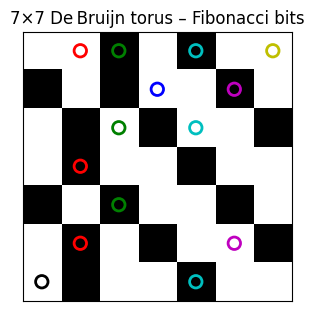

In [3]:
primes=[p for p in range(2,size*size+1) if sp.isprime(p)]
colmap={1:'r',2:'g',3:'b',4:'c',5:'m',6:'y',0:'k'}
seq=''.join('1' if b else '0' for b in bits.flatten())
forb=[i for i in range(49) if seq[i:i+3] in ('000','110','111')]

fig,ax=plt.subplots(figsize=(3.5,3.5))
ax.imshow(bits,cmap='Greys',interpolation='none')
for p in primes:
    r,c=divmod(p-1,size)
    ax.scatter(c,r,s=80,facecolors='none',edgecolors=colmap[(p-1)%7],linewidths=2)
for k in forb:
    r,c=divmod(k,size)
    ax.scatter(c,r,s=200,facecolors='none',edgecolors='k',linewidths=3)
ax.set_xticks([]); ax.set_yticks([])
plt.title('7×7 De Bruijn torus – Fibonacci bits')
plt.show()

## 2  Interactive 3‑D torus

In [13]:

# smoothed plotly torus
bits_hi=np.kron(bits,np.ones((9,9)))
N=bits_hi.shape[0]; R,r=3,1
th=np.linspace(0,2*np.pi,N,endpoint=False)
ph=np.linspace(0,2*np.pi,N,endpoint=False)
TH,PH=np.meshgrid(th,ph,indexing='ij')
X=(R+r*np.cos(PH))*np.cos(TH)
Y=(R+r*np.cos(PH))*np.sin(TH)
Z=r*np.sin(PH)+bits_hi*0.6
go.Figure(data=[go.Surface(x=X,y=Y,z=Z,colorscale='Greys',showscale=False)]
).update_layout(title='Fibonacci bits on torus',
                scene=dict(aspectratio=dict(x=1,y=1,z=0.4)))

fig_fft = go.Figure(
    data=[go.Scatter3d(
        x=X, y=Y, z=Z,
        mode='markers',
        marker=dict(size=6, color=np.log1p(z), colorscale='plasma')
    )]
).update_layout(title='FFT magnitude on sphere',
                scene=dict(xaxis_visible=False,
                           yaxis_visible=False,
                           zaxis_visible=False))
fig_fft.show()          # NEW



## 3  Rolling window animation

In [5]:

seqL=fib_word(200)
fig2,ax2=plt.subplots(figsize=(3,3)); ax2.axis('off')
frames=[[ax2.imshow(seqL[i:i+49].reshape(7,7),cmap='Greys',interpolation='none')] for i in range(60)]
ani=anim.ArtistAnimation(fig2,frames,interval=200,blit=True)
plt.close(fig2)
from IPython.display import HTML
HTML(ani.to_jshtml())


## 4  De Bruijn hypergraph toggle

In [6]:

nodes=[f'{i:03b}' for i in range(8)]
G=nx.DiGraph(); G.add_nodes_from(nodes)
for n in nodes:
    G.add_edge(n,n[1:]+'0'); G.add_edge(n,n[1:]+'1')
present={(seq[i:i+3],seq[i+1:i+4]) for i in range(46)}
def draw(miss=False):
    plt.figure(figsize=(4,4)); pos=nx.circular_layout(G)
    nx.draw_networkx_nodes(G,pos,node_size=500,node_color='lightgrey')
    nx.draw_networkx_labels(G,pos,font_size=8)
    nx.draw_networkx_edges(G,pos,edgelist=list(present),edge_color='b',width=2,arrowsize=15)
    if miss:
        nx.draw_networkx_edges(G,pos,edgelist=[e for e in G.edges if e not in present],
                               edge_color='r',style='dotted')
    plt.axis('off'); plt.show()
wd.interact(draw,miss=False)


interactive(children=(Checkbox(value=False, description='miss'), Output()), _dom_classes=('widget-interact',))

<function __main__.draw(miss=False)>

## 5  FFT‑sphere scatter

In [14]:

amp=np.abs(np.fft.fftshift(np.fft.fft2(bits)))/49
coords=[(i,j,amp[i%7,j%7]) for i in range(-3,4) for j in range(-3,4)]
x,y,z=zip(*coords)
r=np.sqrt(np.array(x)**2+np.array(y)**2)+1e-9
th=np.arctan2(y,x); ph=r/3*np.pi/2
X=np.cos(th)*np.sin(ph); Y=np.sin(th)*np.sin(ph); Z=np.cos(ph)
go.Figure(data=[go.Scatter3d(x=X,y=Y,z=Z,mode='markers',
                             marker=dict(size=6,color=np.log1p(z),colorscale='plasma'))]
).update_layout(title='FFT magnitude on sphere',
                scene=dict(xaxis_visible=False,yaxis_visible=False,zaxis_visible=False))


fig_fft = go.Figure(
    data=[go.Scatter3d(
        x=X, y=Y, z=Z,
        mode='markers',
        marker=dict(size=6, color=np.log1p(z), colorscale='plasma')
    )]
).update_layout(title='FFT magnitude on sphere',
                scene=dict(xaxis_visible=False,
                           yaxis_visible=False,
                           zaxis_visible=False))
fig_fft.show()          # NEW

